In [1]:
# Importing necessary libraries 
import sys
import os
import cv2
from PIL import Image
import numpy as np
import matplotlib.pyplot as plt

# Appending the parent directory (root of the project) to the system path
sys.path.append(os.path.abspath('../'))

In [2]:
# Import custom functions from the src package
from src import generate_dataset, create_image_mask, apply_gaussian_blur_to_bboxes

c:\Users\Tyler\anaconda3\envs\bp_ai\lib\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


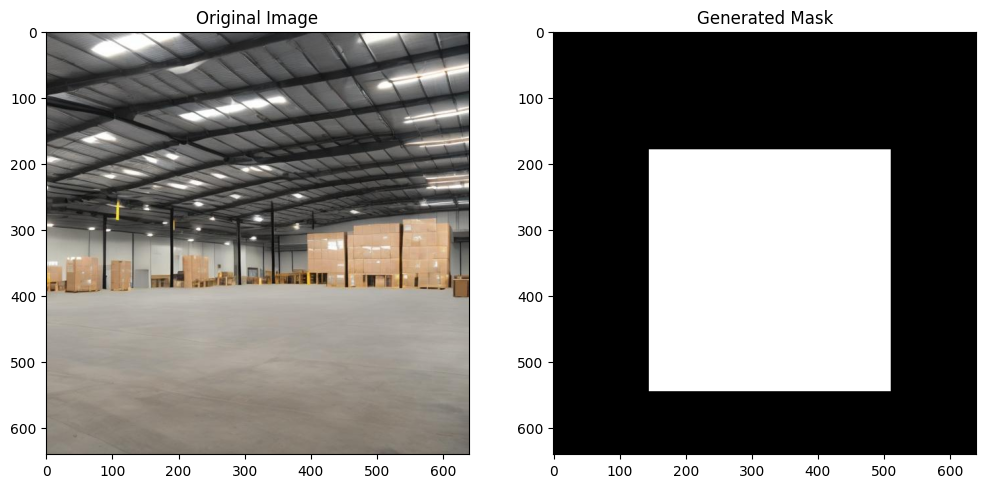

In [3]:
# Load a sample image using OpenCV
sample_image_path = '../data/input/example/warehouse_0000.jpg'  # Replace with the actual path
sample_image = cv2.imread(sample_image_path)
sample_image = cv2.cvtColor(sample_image, cv2.COLOR_BGR2RGB)  # Convert to RGB for visualization

# Create an image mask using the custom mask generation function
mask, bboxes = create_image_mask(sample_image)

# Display the original image and the mask
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.imshow(sample_image)
plt.title('Original Image')
plt.subplot(1, 2, 2)
plt.imshow(mask, cmap='gray')
plt.title('Generated Mask')
plt.show()

In [5]:
# Below is a small demo function for generate_dataset which will generate an inpainted, labeled (YOLO Format) image dataset
def demo_generate_dataset():
    input_dir = '../data/input/example'  # Replace with your input directory
    output_dir = '../data/output/example_dataset_demo'  # Replace with your desired output directory
    prompts_classes_dict = {
        "RAW photo, yellow forklift, 8k uhd, dslr, soft lighting, high quality, film grain, Fujifilm XT3": "0",
    }

    # Call the generate_dataset function
    generate_dataset(input_dir, output_dir, prompts_classes_dict)

    print("Dataset generation function is complete.")

# Run the demo function
demo_generate_dataset()


safety_checker\model.safetensors not found
Fetching 19 files: 100%|██████████| 19/19 [00:00<?, ?it/s]
The config attributes {'scaling_factor': 0.18215} were passed to AutoencoderKL, but are not expected and will be ignored. Please verify your config.json configuration file.
The config attributes {'clip_sample_range': 1.0} were passed to PNDMScheduler, but are not expected and will be ignored. Please verify your scheduler_config.json configuration file.
The config attributes {'addition_embed_type': None, 'addition_embed_type_num_heads': 64, 'class_embeddings_concat': False, 'conv_in_kernel': 3, 'conv_out_kernel': 3, 'cross_attention_norm': None, 'encoder_hid_dim': None, 'mid_block_only_cross_attention': None, 'projection_class_embeddings_input_dim': None, 'resnet_out_scale_factor': 1.0, 'resnet_skip_time_act': False, 'time_cond_proj_dim': None, 'time_embedding_act_fn': None, 'time_embedding_dim': None, 'time_embedding_type': 'positional', 'timestep_post_act': None} were passed to UNet2D

Dataset generation function is complete.


In [6]:
# Below are a few functions to help visualize the results of dataset generation
from PIL import Image, ImageDraw

# Function to read the bounding box annotations from the generated text file
def read_bounding_boxes(file_path, image_width, image_height):
    bounding_boxes = []
    with open(file_path, "r") as file:
        for line in file:
            # Extracting YOLO format coordinates
            _, x_center, y_center, width, height = map(float, line.strip().split())

            # Convert from YOLO format (center) to corner coordinates
            x_min = (x_center - width / 2) * image_width
            y_min = (y_center - height / 2) * image_height
            x_max = (x_center + width / 2) * image_width
            y_max = (y_center + height / 2) * image_height

            bounding_boxes.append((x_min, y_min, x_max, y_max))

    return bounding_boxes

# Function to draw the bounding boxes on the inpainted image
def draw_bounding_boxes(image, bounding_boxes):
    draw = ImageDraw.Draw(image)
    for box in bounding_boxes:
        draw.rectangle(box, outline="red", width=2)
    return image

# Function that handles the reading and drawing of bounding boxes on an image
def overlay_bboxes(image_path, bbox_file_path):
    # Read the image
    image = Image.open(image_path)
    image_width, image_height = image.size

    # Read bounding boxes from file, scaled to image dimensions
    bounding_boxes = read_bounding_boxes(bbox_file_path, image_width, image_height)

    # Draw bounding boxes on the image
    image_with_boxes = draw_bounding_boxes(image, bounding_boxes)

    # Return the result
    return image_with_boxes

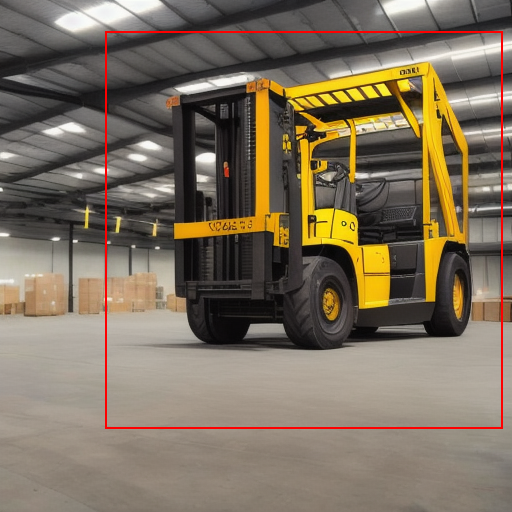

In [8]:
# Visualizing the inpainted image with the generated bounding box label
image_path = "../data/output/example_dataset_demo/warehouse_0000_0_0001.png"
bbox_file_path = "../data/output/example_dataset_demo/warehouse_0000_0_0001.txt"
output_path = "path_to_save_output_image.jpg"

labeled_image = overlay_bboxes(image_path, bbox_file_path)
labeled_image